In [0]:
import numpy as np
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import time

In [0]:
def reload_model():
  global model
  global K
  global sess
  time0 = time.time()
  K.clear_session()
  model = ResNet50(weights='imagenet')
  sess = K.get_session()
  time1 = time.time()
  print('reloading took: {} seconds'.format(time1 - time0))

In [7]:
from google.colab import files

!rm my_img.jpg

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

rm: cannot remove 'my_img.jpg': No such file or directory


Saving my_img.jpg to my_img.jpg
User uploaded file "my_img.jpg" with length 249057 bytes


reloading took: 9.555019617080688 seconds


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02077923', 'sea_lion', 0.91135), ('n01665541', 'leatherback_turtle', 0.061980836), ('n02444819', 'otter', 0.008506746)]


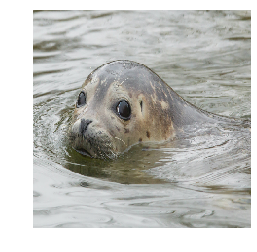

In [8]:
reload_model()
img_path = 'my_img.jpg'
img = image.load_img(img_path, target_size=(224,224))

plt.imshow(img)
plt.grid('off')
plt.axis('off')

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
initial_class = np.argmax(preds)
print('Predicted:', decode_predictions(preds, top=3)[0])

In [0]:

def plot_img(x):
    #Reverse preprocessing
    t = np.zeros_like(x[0])
    t[:,:,0] = x[0][:,:,2]
    t[:,:,1] = x[0][:,:,1]
    t[:,:,2] = x[0][:,:,0]  
    plt.imshow(np.clip((t+[123.68, 116.779, 103.939]), 0, 255)/255)
    plt.grid('off')
    plt.axis('off')
    plt.show()
def show(x_adv):
  plot_img(x_adv)
  plot_img(x_adv - x)
  preds = model.predict(x_adv - x)
  print(e, 'Predicted:', decode_predictions(preds, top=3)[0])

In [0]:
def fgsm(model, img, target, targetted, epsilon):
    loss = K.categorical_crossentropy(K.one_hot(target, 1000), model.output)
    gradient = K.gradients(loss, model.input)
    
    signs = K.sign(gradient[0])
    if targetted:
      x_adv = img - epsilon * signs
    else:
      x_adv = img + epsilon * signs
    x_adv = sess.run(x_adv, feed_dict={model.input:img})
    return x_adv

reloading took: 10.566243171691895 seconds
Predicted: [('n02077923', 'sea_lion', 0.91135), ('n01665541', 'leatherback_turtle', 0.061980836), ('n02444819', 'otter', 0.008506746)]
Instructions for updating:
Use tf.cast instead.
1 iteration of fgsm took: 4.439954519271851 seconds on epsilon = 0.01
Predicted: [('n02077923', 'sea_lion', 0.89362836), ('n01665541', 'leatherback_turtle', 0.0763131), ('n02444819', 'otter', 0.009017028)]
1 iteration of fgsm took: 5.247868537902832 seconds on epsilon = 0.01125335582600765
Predicted: [('n02077923', 'sea_lion', 0.89122146), ('n01665541', 'leatherback_turtle', 0.07827591), ('n02444819', 'otter', 0.009079901)]
1 iteration of fgsm took: 4.689462661743164 seconds on epsilon = 0.012663801734674034
Predicted: [('n02077923', 'sea_lion', 0.8884545), ('n01665541', 'leatherback_turtle', 0.08053642), ('n02444819', 'otter', 0.009150186)]
1 iteration of fgsm took: 4.749483108520508 seconds on epsilon = 0.014251026703029978
Predicted: [('n02077923', 'sea_lion', 

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


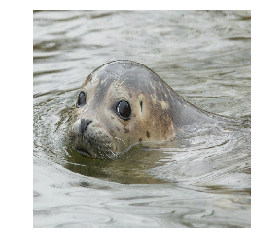

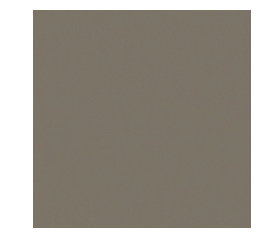

1.0 Predicted: [('n01608432', 'kite', 0.07894931), ('n04266014', 'space_shuttle', 0.048459936), ('n01614925', 'bald_eagle', 0.039688155)]


In [11]:
#Untargeted FGSM

reload_model()
preds = model.predict(x)

initial_class = np.argmax(preds)
print('Predicted:', decode_predictions(preds, top=3)[0])
class_prob = []
store_pred = []
store_prob = []
store_time = []
epsilon_space = np.logspace(-2, 0, num=40)
for e in epsilon_space:
  


  time0 = time.time()
  x_adv = fgsm(model = model, img = x, target = initial_class, targetted = False, epsilon = e)
  time1 = time.time()
  
  diff = time1 - time0
  
  

  print('1 iteration of fgsm took: {} seconds on epsilon = {}'.format(diff, e))

  preds = model.predict(x_adv)
  dec = decode_predictions(preds, top=3)[0]
  print('Predicted:', dec)
  store_time.append(diff)
  class_prob.append(preds[0][initial_class])
  store_prob.append([dec[0][2], dec[1][2], dec[2][2]])
  store_pred.append([dec[0][1], dec[1][1], dec[2][1]])
  
show(x_adv)

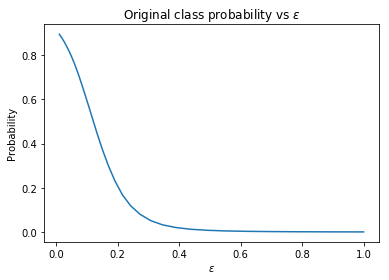

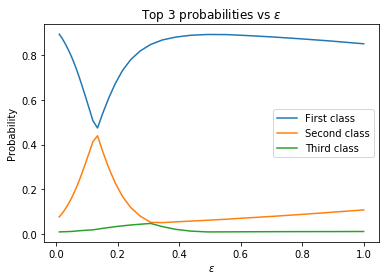

dict_items([('loggerhead', 0), ('sea_lion', 1), ('hippopotamus', 2), ('stingray', 3), ('leatherback_turtle', 4), ('otter', 5)])


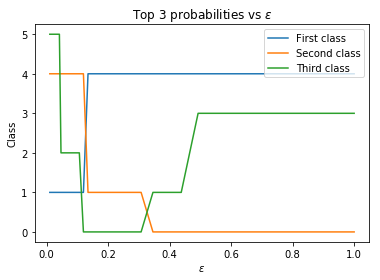

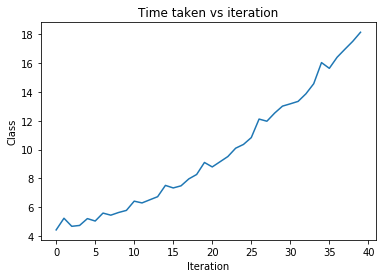

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


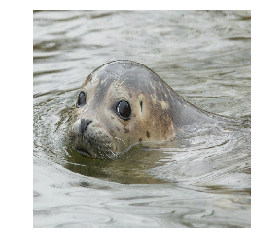

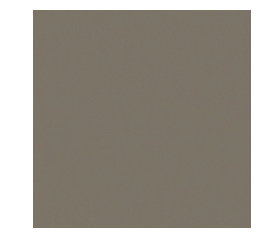

1.0 Predicted: [('n01608432', 'kite', 0.07894931), ('n04266014', 'space_shuttle', 0.048459936), ('n01614925', 'bald_eagle', 0.039688155)]


In [12]:
from collections import defaultdict

plt.plot(epsilon_space, class_prob)
plt.xlabel(r'$\epsilon$')
plt.ylabel('Probability')
plt.title(r'Original class probability vs $\epsilon$')
plt.show()

plt.plot(epsilon_space, store_prob)
plt.xlabel(r'$\epsilon$')
plt.ylabel('Probability')
plt.title(r'Top 3 probabilities vs $\epsilon$')
plt.legend(['First class', 'Second class', 'Third class'])
plt.show()

d = defaultdict(int)
flatten = lambda l: [item for sublist in l for item in sublist]
flat_preds = flatten(store_pred)
nsp = store_pred.copy()
for i,k in enumerate(set(flat_preds)):
  d[k] = i
for i in range(len(store_pred)):
  nsp[i] = [d.get(item,item) for item in store_pred[i]]
plt.plot(epsilon_space, nsp)
print(d.items())
plt.xlabel(r'$\epsilon$')
plt.ylabel('Class')
plt.title(r'Top 3 probabilities vs $\epsilon$')
plt.legend(['First class', 'Second class', 'Third class'])
plt.show()
plt.plot(np.arange(0,len(epsilon_space)), store_time)
plt.xlabel('Iteration')
plt.ylabel('Class')
plt.title('Time taken vs iteration')
plt.show()
#plt.plot(np.arange(0,len(epsilon_space), store_time))

show(x_adv)


reloading took: 11.122733116149902 seconds
Predicted: [('n02077923', 'sea_lion', 0.91135), ('n01665541', 'leatherback_turtle', 0.061980836), ('n02444819', 'otter', 0.008506746)]
1 iteration of fgsm took: 4.600521564483643 seconds on epsilon = 0.01
Predicted: [('n02077923', 'sea_lion', 0.9036555), ('n01665541', 'leatherback_turtle', 0.06519176), ('n02444819', 'otter', 0.009402339)]
1 iteration of fgsm took: 4.7304182052612305 seconds on epsilon = 0.01125335582600765
Predicted: [('n02077923', 'sea_lion', 0.9026262), ('n01665541', 'leatherback_turtle', 0.06560977), ('n02444819', 'otter', 0.009518424)]
1 iteration of fgsm took: 4.8554112911224365 seconds on epsilon = 0.012663801734674034
Predicted: [('n02077923', 'sea_lion', 0.9014389), ('n01665541', 'leatherback_turtle', 0.06609124), ('n02444819', 'otter', 0.009651366)]
1 iteration of fgsm took: 5.047186851501465 seconds on epsilon = 0.014251026703029978
Predicted: [('n02077923', 'sea_lion', 0.90009016), ('n01665541', 'leatherback_turtle'

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


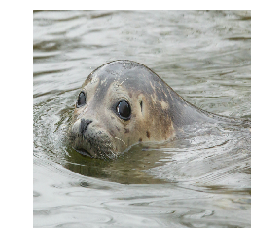

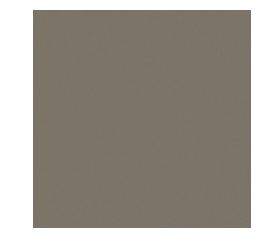

1.0 Predicted: [('n01608432', 'kite', 0.06943793), ('n04266014', 'space_shuttle', 0.045210954), ('n02783161', 'ballpoint', 0.042768985)]


In [13]:
#Targeted FGSM

reload_model()
preds = model.predict(x)

initial_class = np.argmax(preds)
target_class = 346
print('Predicted:', decode_predictions(preds, top=3)[0])
tclass_prob = []
tstore_pred = []
tstore_prob = []
tstore_time = []
tepsilon_space = np.logspace(-2, 0, num=40)
for e in epsilon_space:
  


  time0 = time.time()
  x_adv = fgsm(model = model, img = x, target = target_class, targetted = True, epsilon = e)
  time1 = time.time()
  
  diff = time1 - time0
  
  

  print('1 iteration of fgsm took: {} seconds on epsilon = {}'.format(diff, e))

  preds = model.predict(x_adv)
  dec = decode_predictions(preds, top=3)[0]
  print('Predicted:', dec)
  tstore_time.append(diff)
  tclass_prob.append(preds[0][initial_class])
  tstore_prob.append([dec[0][2], dec[1][2], dec[2][2]])
  tstore_pred.append([dec[0][1], dec[1][1], dec[2][1]])
  
  if diff > 15:
    reload_model()
  
show(x_adv)

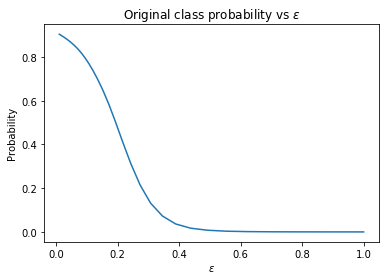

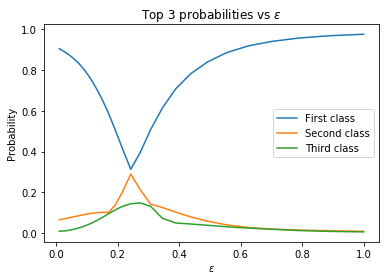

dict_items([('sea_lion', 0), ('hippopotamus', 1), ('Indian_elephant', 2), ('leatherback_turtle', 3), ('otter', 4), ('water_buffalo', 5)])


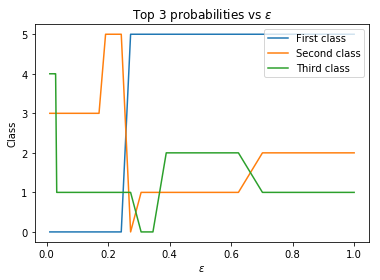

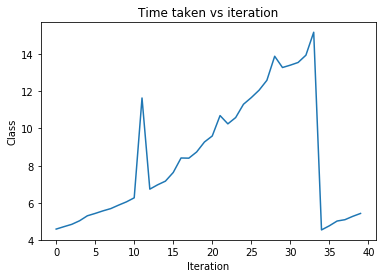

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


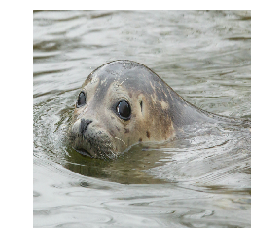

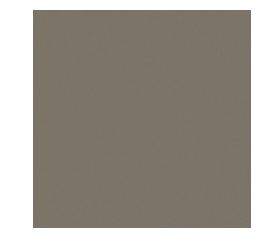

1.0 Predicted: [('n01608432', 'kite', 0.06943793), ('n04266014', 'space_shuttle', 0.045210954), ('n02783161', 'ballpoint', 0.042768985)]


In [14]:
from collections import defaultdict

plt.plot(tepsilon_space, tclass_prob)
plt.xlabel(r'$\epsilon$')
plt.ylabel('Probability')
plt.title(r'Original class probability vs $\epsilon$')
plt.show()

plt.plot(tepsilon_space, tstore_prob)
plt.xlabel(r'$\epsilon$')
plt.ylabel('Probability')
plt.title(r'Top 3 probabilities vs $\epsilon$')
plt.legend(['First class', 'Second class', 'Third class'])
plt.show()

d = defaultdict(int)
flatten = lambda l: [item for sublist in l for item in sublist]
tflat_preds = flatten(tstore_pred)
tnsp = tstore_pred.copy()
for i,k in enumerate(set(tflat_preds)):
  d[k] = i
for i in range(len(tstore_pred)):
  tnsp[i] = [d.get(item,item) for item in tstore_pred[i]]
plt.plot(tepsilon_space, tnsp)
print(d.items())
plt.xlabel(r'$\epsilon$')
plt.ylabel('Class')
plt.title(r'Top 3 probabilities vs $\epsilon$')
plt.legend(['First class', 'Second class', 'Third class'])
plt.show()
plt.plot(np.arange(0,len(tepsilon_space)), tstore_time)
plt.xlabel('Iteration')
plt.ylabel('Class')
plt.title('Time taken vs iteration')
plt.show()
#plt.plot(np.arange(0,len(epsilon_space), store_time))

show(x_adv)


reloading took: 14.33580756187439 seconds
0 Predicted: [('n02077923', 'sea_lion', 0.89362836), ('n01665541', 'leatherback_turtle', 0.0763131), ('n02444819', 'otter', 0.009017028)]
previous 5 iteration of fgsm took: 4.887592077255249 seconds
5 Predicted: [('n02077923', 'sea_lion', 0.7518067), ('n01665541', 'leatherback_turtle', 0.19823559), ('n02398521', 'hippopotamus', 0.011594776)]
previous 5 iteration of fgsm took: 26.68073868751526 seconds
10 Predicted: [('n02077923', 'sea_lion', 0.51571816), ('n01665541', 'leatherback_turtle', 0.41758275), ('n01664065', 'loggerhead', 0.01716189)]
previous 5 iteration of fgsm took: 30.05928373336792 seconds
15 Predicted: [('n01665541', 'leatherback_turtle', 0.66090053), ('n02077923', 'sea_lion', 0.26927915), ('n01664065', 'loggerhead', 0.026941668)]
previous 5 iteration of fgsm took: 36.23504304885864 seconds
20 Predicted: [('n01665541', 'leatherback_turtle', 0.82567006), ('n02077923', 'sea_lion', 0.112746045), ('n01664065', 'loggerhead', 0.03271220

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


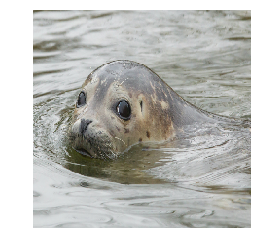

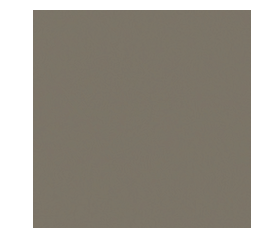

99 Predicted: [('n04266014', 'space_shuttle', 0.068613775), ('n01608432', 'kite', 0.064248994), ('n02783161', 'ballpoint', 0.04194496)]


In [15]:
#Untargetted IM

reload_model()
preds = model.predict(x)
initial_class = np.argmax(preds)
x_adv = x
time0, time1 = time.time(), time.time()
Iclass_prob = []
Istore_pred = []
Istore_prob = []
Istore_time = []
for e in range(100):
    x_adv = fgsm(model = model, img = x_adv, target = initial_class, targetted = False, epsilon = 0.01)
    if e%5==0:
      preds = model.predict(x_adv)
      dec = decode_predictions(preds, top=3)[0]
      print(e, 'Predicted:', dec)
      diff = time.time() - time1
      print('previous 5 iteration of fgsm took: {} seconds'.format(diff))
      time1 = time.time()
      Istore_time.append(diff)
      Istore_prob.append([dec[0][2], dec[1][2], dec[2][2]])
      Istore_pred.append([dec[0][1], dec[1][1], dec[2][1]])
      Iclass_prob.append(preds[0][initial_class])
    if diff > 45:
      reload_model()
      diff = 0
time1 = time.time()

print('100 iteration of fgsm took: {} seconds'.format(time1 - time0))

show(x_adv)

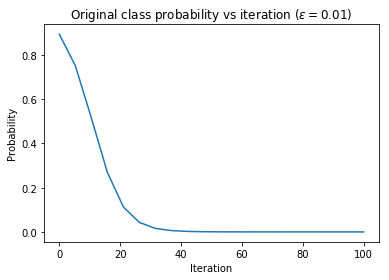

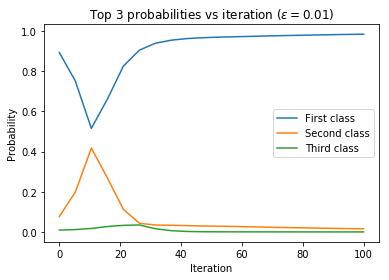

dict_items([('loggerhead', 0), ('sea_lion', 1), ('hippopotamus', 2), ('leatherback_turtle', 3), ('otter', 4), ('terrapin', 5)])


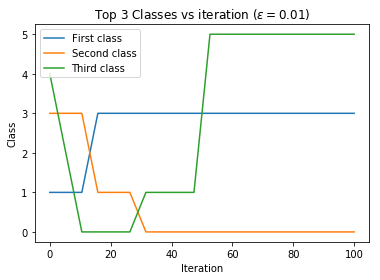

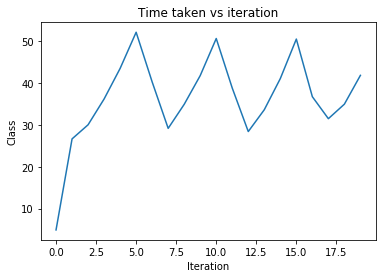

In [16]:
from collections import defaultdict


x_ax = np.linspace(0, 100, num=20)

plt.plot(x_ax, Iclass_prob)
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.title(r'Original class probability vs iteration ($\epsilon = 0.01$)')
plt.show()


#plt.plot(x_ax, Istore_prob)
#plt.scatter(x_ax, [item[0] for item in Istore_prob])
#plt.scatter(x_ax, [item[1] for item in Istore_prob])
#plt.scatter(x_ax, [item[2] for item in Istore_prob])
plt.plot(x_ax, Istore_prob)
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.title(r'Top 3 probabilities vs iteration ($\epsilon = 0.01$)')
plt.legend(['First class', 'Second class', 'Third class'])
plt.show()

d = defaultdict(int)
flatten = lambda l: [item for sublist in l for item in sublist]
Iflat_preds = flatten(Istore_pred)
Insp = Istore_pred.copy()
for i,k in enumerate(set(Iflat_preds)):
  d[k] = i
for i in range(len(Istore_pred)):
  Insp[i] = [d.get(item,item) for item in Istore_pred[i]]
#plt.scatter(x_ax, [item[0] for item in Insp])
#plt.scatter(x_ax, [item[1] for item in Insp])
#plt.scatter(x_ax, [item[2] for item in Insp])
plt.plot(x_ax, Insp)
plt.xlabel('Iteration')
plt.ylabel('Class')
plt.title(r'Top 3 Classes vs iteration ($\epsilon = 0.01$)')
plt.legend(['First class', 'Second class', 'Third class'])

print(d.items())
plt.show()
#plt.scatter(x_ax, Istore_time)
plt.plot(np.arange(0,len(x_ax)), Istore_time)
plt.xlabel('Iteration')
plt.ylabel('Class')
plt.title(r'Time taken vs iteration')

plt.show()
#plt.plot(np.arange(0,len(epsilon_space), store_time))


reloading took: 10.710477113723755 seconds
0 Predicted: [('n02077923', 'sea_lion', 0.9036555), ('n01665541', 'leatherback_turtle', 0.06519176), ('n02444819', 'otter', 0.009402339)]
previous 5 iteration of fgsm took: 4.937650918960571 seconds
5 Predicted: [('n02077923', 'sea_lion', 0.8509791), ('n01665541', 'leatherback_turtle', 0.080821075), ('n02398521', 'hippopotamus', 0.020314628)]
previous 5 iteration of fgsm took: 28.920069217681885 seconds
10 Predicted: [('n02077923', 'sea_lion', 0.759618), ('n01665541', 'leatherback_turtle', 0.09189778), ('n02398521', 'hippopotamus', 0.047318958)]
previous 5 iteration of fgsm took: 29.43328094482422 seconds
15 Predicted: [('n02077923', 'sea_lion', 0.60266316), ('n02408429', 'water_buffalo', 0.103737995), ('n01665541', 'leatherback_turtle', 0.089279644)]
previous 5 iteration of fgsm took: 35.39059662818909 seconds
20 Predicted: [('n02077923', 'sea_lion', 0.37331688), ('n02408429', 'water_buffalo', 0.29125428), ('n02398521', 'hippopotamus', 0.1183

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


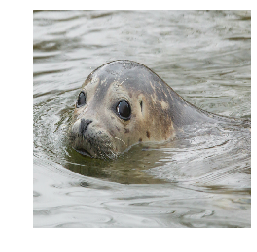

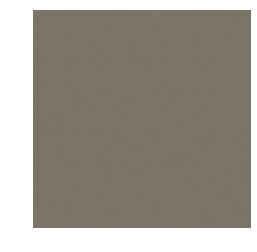

99 Predicted: [('n04266014', 'space_shuttle', 0.0675625), ('n01608432', 'kite', 0.06259006), ('n02783161', 'ballpoint', 0.04169077)]


In [17]:
#Targetted IM

reload_model()
preds = model.predict(x)
initial_class = np.argmax(preds)
target_class = np.argmin(preds)
target_class = 346
x_adv = x
Itclass_prob = []
Itstore_pred = []
Itstore_prob = []
time0, time1 = time.time(), time.time()
for e in range(100):
    x_adv = fgsm(model = model, img = x_adv, target = target_class, targetted = True, epsilon = 0.01)
    if e%5==0:
      preds = model.predict(x_adv)
      dec = decode_predictions(preds, top=3)[0]
      print(e, 'Predicted:', dec)
      diff = time.time() - time1
      print('previous 5 iteration of fgsm took: {} seconds'.format(diff))
      Itstore_prob.append([dec[0][2], dec[1][2], dec[2][2]])
      Itstore_pred.append([dec[0][1], dec[1][1], dec[2][1]])
      Itclass_prob.append(preds[0][initial_class])
      time1 = time.time()
    if diff > 45:
      reload_model()
      diff = 0
    
time1 = time.time()

print('100 iteration of fgsm took: {} seconds'.format(time1 - time0))

show(x_adv)

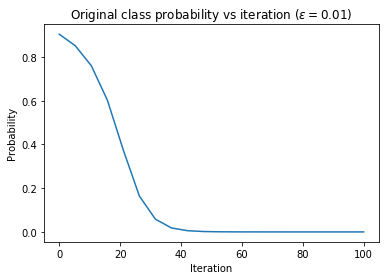

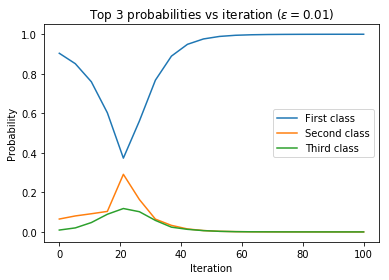

dict_items([('ox', 0), ('sea_lion', 1), ('hippopotamus', 2), ('Indian_elephant', 3), ('leatherback_turtle', 4), ('otter', 5), ('water_buffalo', 6)])


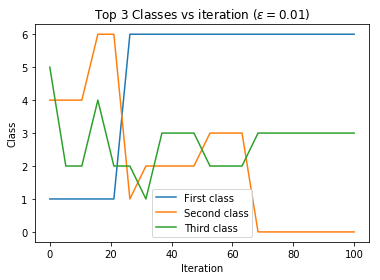

In [18]:
from collections import defaultdict


x_ax = np.linspace(0, 100, num=20)

plt.plot(x_ax, Itclass_prob)
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.title(r'Original class probability vs iteration ($\epsilon = 0.01$)')
plt.show()


#plt.plot(x_ax, Istore_prob)
#plt.scatter(x_ax, [item[0] for item in Istore_prob])
#plt.scatter(x_ax, [item[1] for item in Istore_prob])
#plt.scatter(x_ax, [item[2] for item in Istore_prob])
plt.plot(x_ax, Itstore_prob)
plt.xlabel('Iteration')
plt.ylabel('Probability')
plt.title(r'Top 3 probabilities vs iteration ($\epsilon = 0.01$)')
plt.legend(['First class', 'Second class', 'Third class'])
plt.show()

d = defaultdict(int)
flatten = lambda l: [item for sublist in l for item in sublist]
Itflat_preds = flatten(Itstore_pred)
Itnsp = Itstore_pred.copy()
for i,k in enumerate(set(Itflat_preds)):
  d[k] = i
for i in range(len(Itstore_pred)):
  Itnsp[i] = [d.get(item,item) for item in Itstore_pred[i]]
#plt.scatter(x_ax, [item[0] for item in Insp])
#plt.scatter(x_ax, [item[1] for item in Insp])
#plt.scatter(x_ax, [item[2] for item in Insp])
plt.plot(x_ax, Itnsp)
plt.xlabel('Iteration')
plt.ylabel('Class')
plt.title(r'Top 3 Classes vs iteration ($\epsilon = 0.01$)')
plt.legend(['First class', 'Second class', 'Third class'])

print(d.items())
plt.show()
